In [1]:

import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
import scipy.io as sio
import skimage as ski
import tqdm
import seaborn as sns
import pandas as pd
from pathlib import Path
import pickle as pkl
from sklearn.neighbors import KernelDensity
from  scipy.stats import gaussian_kde


cwd = Path().resolve()

In [2]:
# Define overall variables used to analyze the data
resolution = 16.81E-6 # adding resolution in meters
lowFlowVelCutoff = 6.5 * 10 ** float(-6) #0.000207 # 5.13 * 10 ** float(-5) # 0.5 * 10 ** float(-5)
poreDiamThresh = 20
poreVolumeCutoff = 38000
simPressure = 0.00005 # This is currently hardcoded!!
imageSize = 512
experimentTime = 90 * 10 ** float(-6) # specify NMR time

filePath = cwd / 'subBeadPackPy512_justSpheres.npy'
primaryImage = np.load(filePath)

filePath = cwd / 'finalSimFile3D512.npy'
secondaryImage = np.load(filePath)
primaryImage[primaryImage == 255] = 1

primaryImage = np.transpose(primaryImage)
secondaryImage = np.transpose(secondaryImage)

filePath = cwd / 'primarySnowOut.npy'
primarySnow = np.load(filePath)
filePath = cwd / 'primaryPoreInfo.p'
#primaryInfo = np.load(filePath,allow_pickle=True)
poreInfoPrimary = pkl.load(open(filePath,'rb'))

filePath = cwd / 'secondarySnowOut.npy'
secondarySnow = np.load(filePath)
filePath = cwd / 'secondaryPoreInfo.p'
#secondaryInfo = np.load(filePath,allow_pickle=True)
poreInfoSecondary = pkl.load(open(filePath,"rb"))


In [3]:
filePath = cwd / 'velocityFiles' / 'velocityNormCodeSecondary_0.00005.mat'
velSecondaryMat = sio.loadmat(filePath)
velDataNormSecondary = velSecondaryMat['velNorm']

filePath = cwd / 'velocityFiles' / 'velocityNormCodePrimary_0.00005.mat'
velPrimaryMat = sio.loadmat(filePath)
velDataNormPrimary = velPrimaryMat['velNorm']


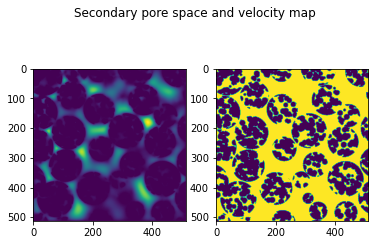

In [4]:
slice = 35

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Secondary pore space and velocity map')
p1.imshow(velDataNormSecondary[:,:,slice])
p2.imshow(secondaryImage[:,:,slice])

fig.savefig('secondaryPoreImage.png', dpi=300, facecolor='w', edgecolor='w')

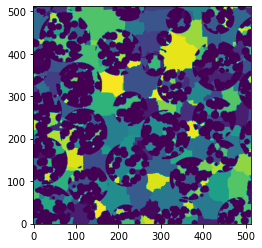

In [5]:
plt.imshow(ps.tools.randomize_colors(secondarySnow[:,:,slice]), origin='lower')
plt.savefig('secondaryRegions.png', dpi=300, facecolor='w', edgecolor='w')


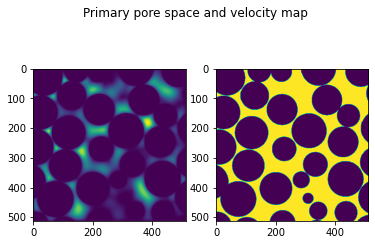

In [6]:
slice = 35

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Primary pore space and velocity map')
p1.imshow(velDataNormPrimary[:,:,slice])
p2.imshow(primaryImage[:,:,slice])

fig.savefig('primaryPoreImage.png', dpi=300, facecolor='w', edgecolor='w')

### Load all the data

In [7]:
intraPoreMeanPoreVelocity = np.load('intraPore_meanVel.npy')
intraPore_metric_PoreVelocity = np.load('intraPore_metricVel.npy')
intraPoreVolumeVector = np.load('intraPoreVolumeVector.npy')
intraPoreVelocityDataframe = np.load('intraPoreVelocityDataframe.npy')
intraPoreVolumeDataframe = np.load('intraPoreVolumeDataframe.npy')

maskedSecondaryMeanPoreVelocity = np.load('maskedPore_meanVel.npy')
maskedSecondary_metric_PoreVelocity = np.load('maskedPore_metricVel.npy')
maskedSecondaryPoreVolumeVector = np.load('maskedPoreVolumeVector.npy')
maskedSecondaryPoreVolumeDataframe = np.load('maskedPoreVolumeDataframe.npy')
maskedSecondaryPoreVelocityDataframe = np.load('maskedPoreVelocityDataframe.npy')

df_secondaryVelocity = pd.read_pickle('secondaryVelocities.pkl')

## Format Dataframe


In [8]:
copyInterGrainPoreVol = np.array(df_secondaryVelocity["Intergrain Pore Volume"])
filtInterGrainVel = np.zeros(copyInterGrainPoreVol.shape)
for a in range(len(copyInterGrainPoreVol)):
    if np.isnan(copyInterGrainPoreVol[a]):
        filtInterGrainVel[a] = 0
    else:
        filtInterGrainVel[a] = copyInterGrainPoreVol[a]

In [9]:
df_secondaryVelocity["Intragrain Pore Volume"] = df_secondaryVelocity["Intragrain Pore Volume"] - filtInterGrainVel

In [10]:
df_secondaryVelocity

,All secondary regions,All secondary pore volumes,Median secondary pore velocity,Intragrain Pore Volume,Intragrain Median Velocity,Intergrain Pore Volume,Intergrain Median Velocity
0,0,0.0,0.000000e+00,NaN,NaN,NaN,NaN
1,1,1391.0,1.883050e-08,1391,1.88305e-08,NaN,NaN
2,2,5440.0,7.619900e-07,5440,7.6199e-07,NaN,NaN
3,3,52403.0,3.808600e-06,0,1.1715e-07,52403,4.3474e-06
4,4,214270.0,5.869350e-06,0,5.5721e-07,214270,6.947e-06
...,...,...,...,...,...,...,...
6388,6388,111.0,1.260050e-07,0,1.0832e-07,111,1.97475e-07
6389,6389,211.0,NaN,NaN,NaN,NaN,NaN
6390,6390,422.0,NaN,NaN,NaN,NaN,NaN
6391,6391,192.0,NaN,NaN,NaN,NaN,NaN


## Plot Pore Volume

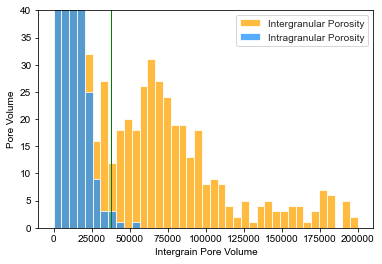

In [11]:
volumeBins = np.linspace(0, 200000, num=40)

fig, ax = plt.subplots()
sns.set_style('whitegrid')

sns.histplot(data=df_secondaryVelocity["Intergrain Pore Volume"],
     bins=volumeBins,color="orange", label="Intergranular Porosity")
sns.histplot(data=df_secondaryVelocity["Intragrain Pore Volume"],
     bins=volumeBins,color="dodgerblue", label="Intragranular Porosity")


#sns.displot(data=[df_secondaryVelocity["Intragrain Pore Volume"], df_secondaryVelocity["Intergrain Pore Volume"]],
#            bins=volumeBins)
plt.ylim([0,40])
plt.legend()
plt.ylabel('Pore Volume')

plt.plot([poreVolumeCutoff, poreVolumeCutoff],[0,200],'g',lw=1)

figStr = 'interAndIntraPoreVolume_pressure_'+str(simPressure)+'.png'

plt.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')


## Plot inter and intragranular porosity


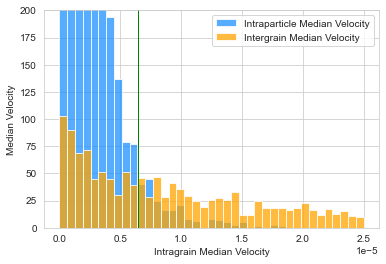

In [12]:
bins = np.linspace(0.000002, 0.00005, num=20)
#np.append(bins,0.0001)
bins = np.append(bins, 1000)
bins = np.insert(bins, 0, 0)
bins = np.insert(bins, 1, 0.00000001)
bins = np.insert(bins, 2, 0.0000001)
bins = np.insert(bins, 3, 0.000001)


binnedIntraVel = pd.cut(df_secondaryVelocity["Intragrain Median Velocity"], bins=bins, right=False)
binnedInterVel = pd.cut(df_secondaryVelocity["Intergrain Median Velocity"], bins=bins, right=False)
df_secondaryVelocity["binned_intraVelocity"] = binnedIntraVel
df_secondaryVelocity["binned_interVelocity"] = binnedIntraVel

yMax = 3000
velBins = np.linspace(0, 0.000025, num=40)

fig, ax = plt.subplots()
#fig.suptitle('Intra and inter pore velocities', fontsize=20)
sns.histplot(data=df_secondaryVelocity["Intragrain Median Velocity"],bins=velBins,
             ax=ax,color="dodgerblue", label="Intraparticle Median Velocity")
sns.histplot(data=df_secondaryVelocity["Intergrain Median Velocity"], bins=velBins,
             ax=ax, color="orange", label="Intergrain Median Velocity")
plt.legend()
ax.set_ylim([0,200])
ax.set_ylabel('Median Velocity')

lowFlowVelCutoff = 6.5 * 10 ** float(-6) #0.000207 # 5.13 * 10 ** float(-5) # 0.5 * 10 ** float(-5)
ax.plot([lowFlowVelCutoff , lowFlowVelCutoff],[0,200],'g',lw=1)

figStr = 'interAndIntraPoreVelocity_pressure_'+str(simPressure)+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')



## Plot both pore volume and median velocity

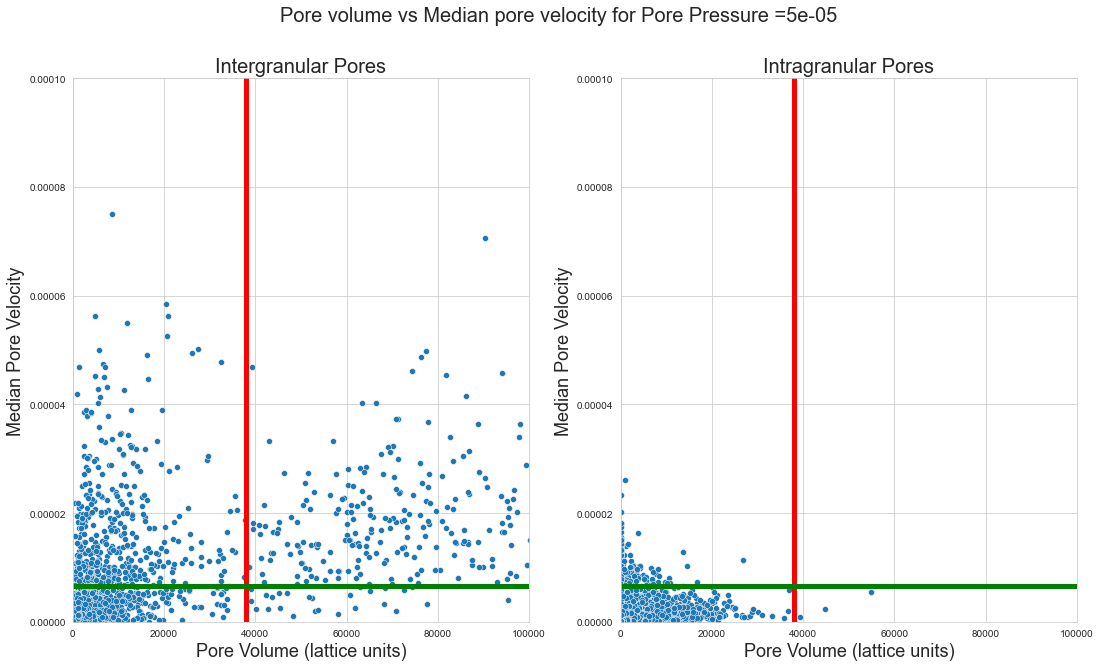

In [32]:
########################################

yMax = 0.0001
xMax = 100000#np.max(df_secondaryVelocity["Intergrain Pore Volume"])

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Pore volume vs Median pore velocity for Pore Pressure ='+str(simPressure), fontsize=20)
sns.scatterplot(data=df_secondaryVelocity,x="Intergrain Pore Volume", y='Intergrain Median Velocity',ax=axes[0])
axes[0].set_xlabel('Pore Volume (lattice units)', fontsize=18)
axes[0].set_ylabel('Median Pore Velocity', fontsize=18)
axes[0].set_title('Intergranular Pores', fontsize=20)
axes[0].set_ylim([0,yMax])
axes[0].set_xlim([0,xMax])
axes[0].plot([poreVolumeCutoff, poreVolumeCutoff],[0,yMax],'r',lw=5)
axes[0].plot([0,xMax],[lowFlowVelCutoff, lowFlowVelCutoff],'g',lw=5)

sns.scatterplot(data=df_secondaryVelocity, x="Intragrain Pore Volume", y='Intragrain Median Velocity',ax=axes[1])
axes[1].set_xlabel('Pore Volume (lattice units)', fontsize=18)
axes[1].set_ylabel('Median Pore Velocity', fontsize=18)
axes[1].set_title('Intragranular Pores', fontsize=20)
axes[1].set_ylim([0,yMax])
axes[1].set_xlim([0,xMax])
axes[1].plot([poreVolumeCutoff, poreVolumeCutoff],[0,yMax],'r',lw=5)
axes[1].plot([0,xMax],[lowFlowVelCutoff, lowFlowVelCutoff],'g',lw=5)

figStr = 'poreVolumeVsPoreVelocity_zoomIn'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')


In [ ]:
df_secondaryVelocity.count()

# IN PROGRESS RESEARCH BELOW

## Add diffusion broadening to simulation data

In [15]:
D_0 = 2.023 * 10 ** float(-9) # for water at twenty degrees Celsius
T = 90 * 10 ** float(-6) # 90 ms, same as NMR experiment
diffusionLength = np.sqrt(D_0 * T)
diffusionVel = diffusionLength/T

randList = [-1,1]
diffusionSign = np.random.choice(randList,len(df_secondaryVelocity["All secondary regions"]))
diffusionDist = np.random.rand(len(df_secondaryVelocity["All secondary regions"]))

# FIXME: how is this defined really?
# figure out sigma of diffusion distribution
diffusionDist = np.random.normal(0,diffusionVel,len(df_secondaryVelocity["All secondary regions"]))
#diffusionDistScale = (diffusionDist-np.mean(diffusionDist)) / np.std(diffusionDist)
diffusionDistScale = (diffusionDist-np.min(diffusionDist)) / (np.max(diffusionDist)-np.min(diffusionDist))
diffusionDistScale = diffusionDistScale - np.mean(diffusionDistScale)
#diffusionAdd = diffusionAdd / np.mean(diffusionAdd)

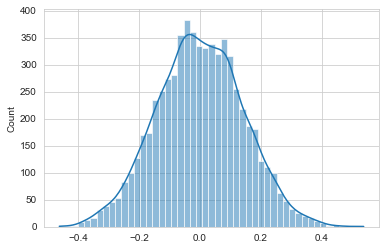

In [16]:
fig, ax = plt.subplots()

sns.histplot(diffusionDistScale,kde=True)

figStr = 'diffDist'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

In [18]:
secondaryMedianVel = df_secondaryVelocity["Median secondary pore velocity"]
secondaryMedianVel = np.array(secondaryMedianVel)
#secondaryVelScale = (secondaryMedianVel - np.nanmean(secondaryMedianVel)) / np.nanstd(secondaryMedianVel)
secondaryVelScale = (secondaryMedianVel - np.nanmin(secondaryMedianVel)) / (np.nanmax(secondaryMedianVel) - np.nanmin(secondaryMedianVel))

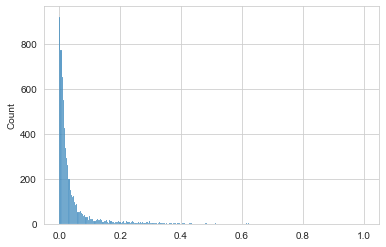

In [19]:
fig, ax = plt.subplots()

sns.histplot(secondaryVelScale)

figStr = 'simVelDist'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

### Plot all pore velocities

In [20]:
# filter by pore space
allVelocities = velDataNormSecondary[secondaryImage == True]
# smush into one dimension
allVelocities = np.squeeze(allVelocities)
# normalize by mean velocity
allVelocitiesNorm = allVelocities / np.mean(allVelocities)

In [21]:
allDisplacementNorm = allVelocitiesNorm * resolution * experimentTime # this is now in units of length

In [22]:
bins = np.linspace(0.000002, 0.00005, num=20)
#np.append(bins,0.0001)
bins = np.append(bins, 1000)
bins = np.insert(bins, 0, 0)
bins = np.insert(bins, 1, 0.00000001)
bins = np.insert(bins, 2, 0.0000001)
bins = np.insert(bins, 3, 0.000001)

binnedAllDisplacements = pd.cut(allDisplacementNorm, bins=bins, right=False)


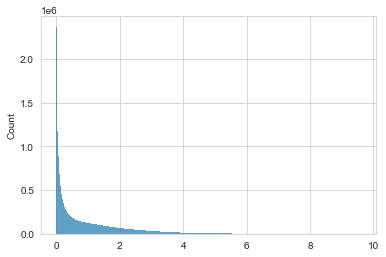

In [23]:
sns.histplot(allVelocitiesNorm) # This command is slow

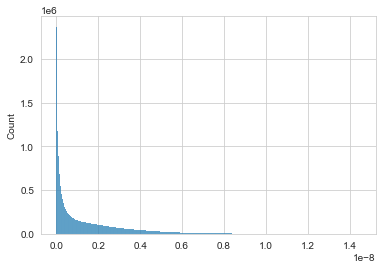

In [24]:
fig, ax = plt.subplots()

sns.histplot(allDisplacementNorm)

figStr = 'simulatedDisplacement'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

## Load NMR data

In [25]:
filePath = cwd / 'summedNMRDisp.mat'
NMR_dispData = sio.loadmat(filePath)
NMRDisp = NMR_dispData['summedDispData']

In [26]:
NMRDispScale = (NMRDisp - np.nanmean(NMRDisp)) / (np.nanmax(NMRDisp)-np.nanmin(NMRDisp))
NMRDispScale = np.transpose(NMRDispScale)
NMRDispScale = np.squeeze(NMRDispScale)

In [27]:
indices = [i for i in range(NMRDispScale.size)]

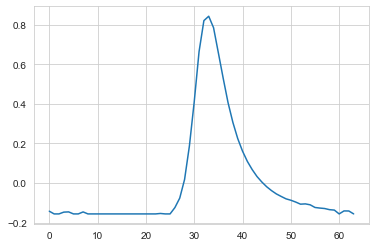

In [28]:
fig, ax = plt.subplots()

plt.plot(indices,NMRDispScale,axes=ax)

figStr = 'NMRDispHist'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')




In [ ]:
 np.where(secondaryVelPlusDiffusion[3] == np.nan)

In [ ]:
indices = [i for i in range(secondaryVelScale.size)]
secondaryVelScale = np.sort(secondaryVelScale)
secondaryVelScale = np.flip(secondaryVelScale)
plt.plot(indices,secondaryVelScale)


In [ ]:
secondaryVelPlusDiffusion = secondaryVelScale + diffusionDistScale

fig, ax = plt.subplots()

sns.histplot(secondaryVelPlusDiffusion,ax=ax,kde=True)

figStr = 'simDispHist'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')

In [ ]:
indices = np.where(np.isnan(secondaryVelPlusDiffusion), False, True)
secondaryVelPlusDiffusion = secondaryVelPlusDiffusion[indices]

In [ ]:
indices = [i for i in range(secondaryVelPlusDiffusion.size)]
plt.plot(indices,secondaryVelPlusDiffusion)

In [ ]:
testKDE = gaussian_kde(secondaryVelPlusDiffusion)
indices = np.random.rand(len(secondaryVelPlusDiffusion))
plotKDE = testKDE.evaluate(indices)

In [ ]:
plt.plot(indices,plotKDE)


In [ ]:
np.random.rand(10)

In [ ]:
filePath = cwd / 'summedNMRDisp.mat'
NMR_dispData = sio.loadmat(filePath)
NMRDisp = NMR_dispData['summedDispData']

In [ ]:
NMRDispScale = (NMRDisp - np.nanmean(NMRDisp)) / (np.nanmax(NMRDisp)-np.nanmin(NMRDisp))
NMRDispScale = np.transpose(NMRDispScale)
NMRDispScale = np.squeeze(NMRDispScale)

In [ ]:
indices = [i for i in range(NMRDispScale.size)]

In [ ]:
fig, ax = plt.subplots()

plt.plot(indices,NMRDispScale,axes=ax)

figStr = 'NMRDispHist'+'.png'

fig.savefig(figStr, dpi=300, facecolor='w', edgecolor='w')



# Calculate flowing fraction for this data

In [29]:
intergrainPoreCount = df_secondaryVelocity["Intergrain Pore Volume"].count()
print('Number of inter particle pores is',str(intergrainPoreCount))

# Final porosity calculation
porosityCalc = ps.metrics.porosity(secondaryImage)
print('Total porosity:')
print(np.round(porosityCalc,2))

# Get grains
flippedImage = np.copy(secondaryImage)
flippedImage[secondaryImage == 1] = 0
flippedImage[secondaryImage == 0] = 1

Number of inter particle pores is 1423
Total porosity:
0.55


### Refer to other code for less/more mobile calculation
## lowFlowCompute.py
